# Decision Tree:
used for a classification problem and same can be extended to regression
can handle all categorical, numerical and mixed type input variables

1. Root
2. Parent/child nodes
3. branches, splitting
4. leaf nodes

perfectly homogeneous leaf node
at every node, we split the data points and the goal is to get a homogenous child node
impurity should be lowest to 0
0 means no impurity, 1 means 100% impurity


Entropy (H): is a measure of uncertainty
H = - [P(H) log2 P(H) + P(T) log2 P(T)]

Information Gain = Entropy reduction
InfoGain (I) = Entropy of the info before split - Entropy of the examples after split

### Entropy or Gini index both can be used as a measure of impurity.

#### Step 1. Importing Libraries
#### Step 2. Data Loading
#### Step 3. EDA
#### Step 4. Data Preprocessing
#### Step 5. Model Building
#### Step 6. Evaluate the performance of model

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
df.shape

(303, 14)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [83]:
df.duplicated().sum()

1

In [84]:
df.drop_duplicates(inplace = True)

In [85]:
df.duplicated().sum()

0

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

In [87]:
# X = df.drop(columns = 'target')
# y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 60)

# model1 = DecisionTreeClassifier()

# model1.fit(X_train, y_train)

# y_pred = model1.predict(X_test)

# accuracy_score(y_test, y_pred)

### .fit : for model training
### .fit_transform: for performing encoding

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns='target')
y = df['target']

best_accuracy = 0
best_random_state = None

for rs in range(1, 1001):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    model = DecisionTreeClassifier(random_state=rs, max_depth = 5)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test)) * 100
    if acc > best_accuracy:
        best_accuracy = acc
        best_random_state = rs

print(f"The optimal random_state is {best_random_state}, yielding a maximum accuracy of {best_accuracy:.2f}%.")

The optimal random_state is 323, yielding a maximum accuracy of 93.44%.


In [90]:
model.get_depth()

5

### Checking for overfitting

In [92]:
y_pred_train = model.predict(X_train)

In [93]:
accuracy_score(y_train, y_pred_train)

0.91701244813278

In [94]:
# depth, train, test

# 8, 100, 91.8    overfitted
# 7, 98.3, 90.16
# 6, 95.8, 91.8
# 5, 91.7, 93.44

### Vizualize the tree

[Text(0.5482954545454546, 0.9166666666666666, 'x[2] <= 0.5\ngini = 0.495\nsamples = 241\nvalue = [108, 133]'),
 Text(0.3068181818181818, 0.75, 'x[11] <= 0.5\ngini = 0.408\nsamples = 112\nvalue = [80, 32]'),
 Text(0.42755681818181823, 0.8333333333333333, 'True  '),
 Text(0.18181818181818182, 0.5833333333333334, 'x[8] <= 0.5\ngini = 0.498\nsamples = 51\nvalue = [24, 27]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[12] <= 2.5\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(0.045454545454545456, 0.25, 'x[7] <= 96.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.13636363636363635, 0.25, 'x[6] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.11363636363636363, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1590909090909091, 0.08333333333333333, 'gin

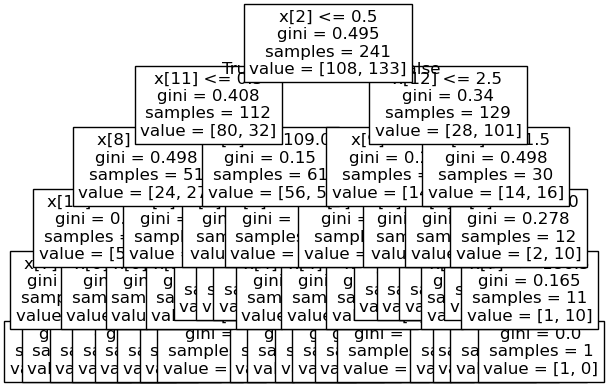

In [96]:
from sklearn import tree
tree.plot_tree(model, fontsize = 12)

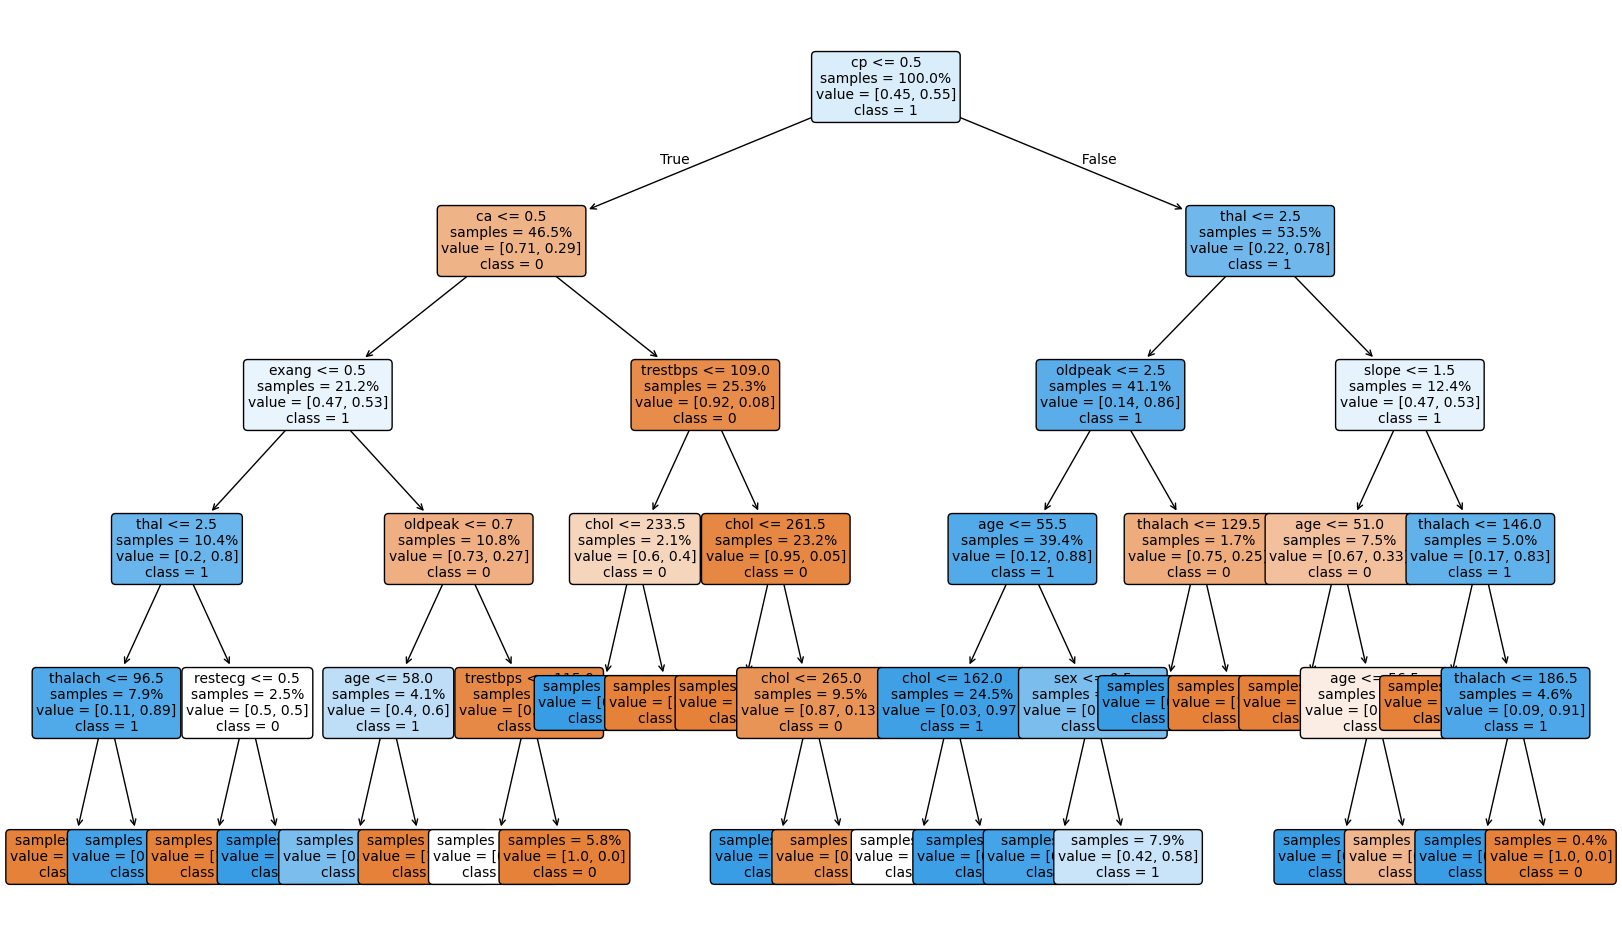

In [97]:
plt.figure(figsize=(20,12))
tree.plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=[str(c) for c in model.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True,
    impurity=False,
    precision=2
)
plt.show()